In [ ]:
!pip install pandas pgmpy
!pip install pandas pgmpy
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination # Make sure this line is execut

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [ ]:
data = pd.read_csv("/content/dataset.csv")
heart_disease = pd.DataFrame(data)
head = heart_disease.head()
print(head)

   age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0    0       0       1     1          3           0             1
1    0       1       1     1          3           0             1
2    1       0       0     0          2           1             1
3    4       0       1     1          3           2             0
4    3       1       1     0          0           2             0


In [ ]:
model = BayesianModel([
('age', 'Lifestyle'),
('Gender','Lifestyle'),
('Family','heartdisease'),
('diet','cholestrol'),
('Lifestyle','diet'),
('cholestrol','heartdisease'),
('diet','cholestrol'),])
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

In [ ]:
heartDisease_infer = VariableElimination(model)
print('For age Enter (SuperSeniorCitizen:0, SeniorCitizen:1,MiddleAged:2, Youth:3, Teen:4')
print('For Gender Enter (Male:0, Female:1)')
print('For Family History Enter (Yes:1, No:0)')
print('For diet Enter (High:0, Medium:1)')
print('For LifeStyle Enter (Athlete:0, Active:1, Moderate:2,Sedentary:3)')
print('For cholesterol Enter (High:0, BorderLine:1, Normal:2)')



For age Enter (SuperSeniorCitizen:0, SeniorCitizen:1,MiddleAged:2, Youth:3, Teen:4
For Gender Enter (Male:0, Female:1)
For Family History Enter (Yes:1, No:0)
For diet Enter (High:0, Medium:1)
For LifeStyle Enter (Athlete:0, Active:1, Moderate:2,Sedentary:3)
For cholesterol Enter (High:0, BorderLine:1, Normal:2)


For age Enter (SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4)
For Gender Enter (Male:0, Female:1)
For Family History Enter (Yes:1, No:0)
For diet Enter (High:0, Medium:1)
For LifeStyle Enter (Athlete:0, Active:1, Moderate:2, Sedentary:3)
For cholesterol Enter (High:0, BorderLine:1, Normal:2)
Enter Age(0:SuperSeniorCitizen,1:SeniorCitizen,2:MiddleAged,3:Youth,4;Teen)3
Enter Gender (0:Male,1:Female)0
Enter Family History (0:Yes,1:No)0
Enter Diet (0:High,1:Medium)1
Enter Lifestyle(0:Athlete,1:Active,2:Moderate,3:Sedentary)2
Enter Cholestrol(0:High,1:BorderLine,2:Normal)2


Heart Disease Prediction
0.0 : 0.0000


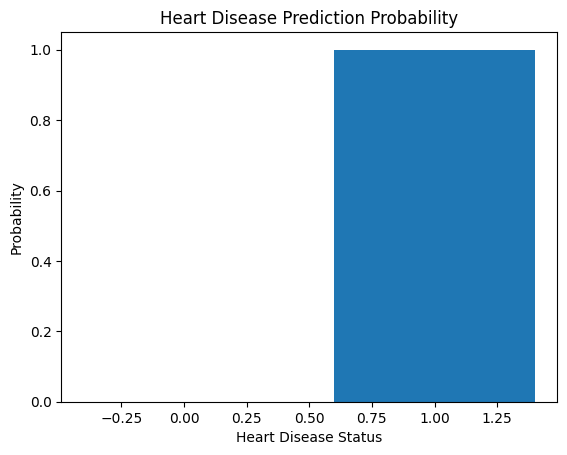

1.0 : 1.0000


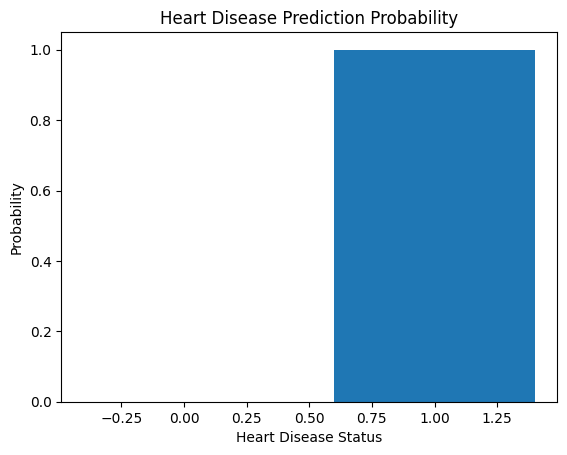

In [ ]:
heartDisease_infer = VariableElimination(model)
print('For age Enter (SuperSeniorCitizen:0, SeniorCitizen:1, \
MiddleAged:2, Youth:3, Teen:4)')
print('For Gender Enter (Male:0, Female:1)')
print('For Family History Enter (Yes:1, No:0)')
print('For diet Enter (High:0, Medium:1)')
print('For LifeStyle Enter (Athlete:0, Active:1, Moderate:2, \
Sedentary:3)')
print('For cholesterol Enter (High:0, BorderLine:1, Normal:2)')

try:
  age=int(input('Enter Age(0:SuperSeniorCitizen,1:SeniorCitizen,2:MiddleAged,3:Youth,4;Teen)'))
  gender=int(input('Enter Gender (0:Male,1:Female)'))
  family_history=int(input('Enter Family History (0:Yes,1:No)'))
  diet=int(input('Enter Diet (0:High,1:Medium)'))
  lifestyle=int(input('Enter Lifestyle(0:Athlete,1:Active,2:Moderate,3:Sedentary)'))
  cholestrol=int(input('Enter Cholestrol(0:High,1:BorderLine,2:Normal)'))
  q = heartDisease_infer.query(variables=['heartdisease'],evidence={
    'age': age,
    'Gender': gender,
    'Family': family_history,
    'diet': diet,
    'Lifestyle': lifestyle,
    'cholestrol': cholestrol
  })
  print('Heart Disease Prediction')
  for state, prob in zip(q.values,q.state_names['heartdisease']):
    print(f"{state} : {prob:.4f}")
    plt.bar(q.state_names['heartdisease'],q.values)
    plt.xlabel('Heart Disease Status')
    plt.ylabel('Probability')
    plt.title('Heart Disease Prediction Probability')
    plt.show()
except ValueError:
    print('Invalid Input')
